<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Ghost_node.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

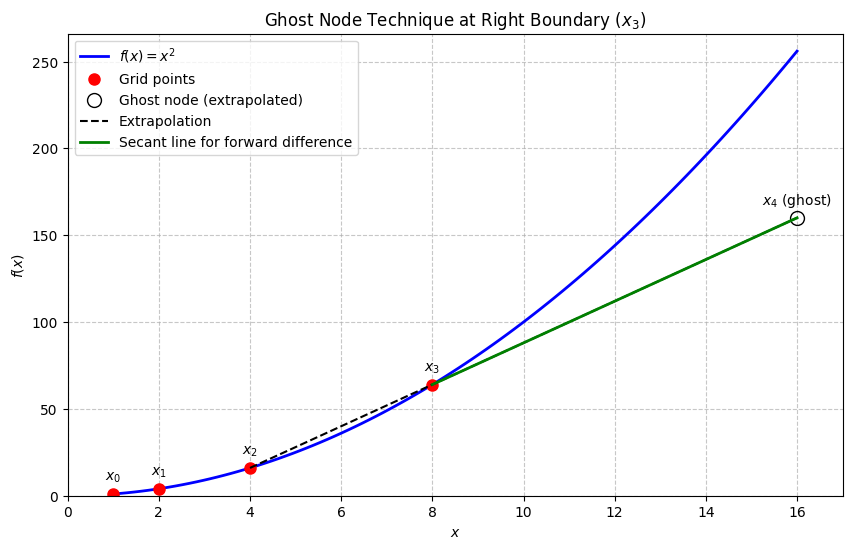

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Set up the plot
plt.figure(figsize=(10, 6))
plt.grid(True, linestyle='--', alpha=0.7)

# Define the geometric grid
x0 = 1
q = 2
nodes = [x0 * q**i for i in range(4)]  # x0, x1, x2, x3
ghost_node = nodes[-1] * q  # x4

# Define the function f(x) = x^2
def f(x):
    return x**2

# Calculate function values
y_nodes = [f(x) for x in nodes]
y_ghost = f(ghost_node)

# Create extrapolation line (linear extrapolation from last two points)
# Using points (x2, y2) and (x3, y3) to extrapolate to x4
slope = (y_nodes[-1] - y_nodes[-2]) / (nodes[-1] - nodes[-2])
extrapolated_y = y_nodes[-1] + slope * (ghost_node - nodes[-1])

# Plot the actual function
x_continuous = np.linspace(nodes[0], ghost_node, 100)
plt.plot(x_continuous, f(x_continuous), 'b-', linewidth=2, label='$f(x) = x^2$')

# Plot the grid points
plt.plot(nodes, y_nodes, 'ro', markersize=8, label='Grid points')

# Plot the ghost node (extrapolated value)
plt.plot(ghost_node, extrapolated_y, 'ko', markerfacecolor='none',
         markersize=10, label='Ghost node (extrapolated)')

# Draw the extrapolation line
plt.plot([nodes[-2], ghost_node], [y_nodes[-2], extrapolated_y],
         'k--', linewidth=1.5, label='Extrapolation')

# Draw the secant line for the forward difference
plt.plot([nodes[-1], ghost_node], [y_nodes[-1], extrapolated_y],
         'g-', linewidth=2, label='Secant line for forward difference')

# Add annotations
plt.annotate('$x_0$', (nodes[0], f(nodes[0])), textcoords="offset points",
             xytext=(0,10), ha='center')
plt.annotate('$x_1$', (nodes[1], f(nodes[1])), textcoords="offset points",
             xytext=(0,10), ha='center')
plt.annotate('$x_2$', (nodes[2], f(nodes[2])), textcoords="offset points",
             xytext=(0,10), ha='center')
plt.annotate('$x_3$', (nodes[3], f(nodes[3])), textcoords="offset points",
             xytext=(0,10), ha='center')
plt.annotate('$x_4$ (ghost)', (ghost_node, extrapolated_y),
             textcoords="offset points", xytext=(0,10), ha='center')

# Add labels and title
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Ghost Node Technique at Right Boundary ($x_3$)')
plt.legend()

# Set axis limits
plt.xlim(nodes[0] - 1, ghost_node + 1)
plt.ylim(0, f(ghost_node) + 10)

# Save as PDF
plt.savefig('ghost_node.pdf', format='pdf', bbox_inches='tight')
plt.show()